Based on: https://www.datacamp.com/community/tutorials/xgboost-in-python

# The Data We Will Use

In [27]:
from sklearn.datasets import load_boston

boston = load_boston()

print(boston.data.shape)

(506, 13)


In [28]:
import pandas as pd

data = pd.DataFrame(boston.data)

data.columns = boston.feature_names

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [29]:
data['PRICE'] = boston.target

In [30]:
# print(boston.feature_names)

# print(boston.DESCR)

# data.describe()

In [31]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [32]:
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X,label=y)

# Splitting the Data in a Train and Test Set

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Training The Xgboost Model

In [34]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Making Predictions With Our Xgboost Model

In [35]:
preds = xg_reg.predict(X_test)

# Assessing the Performance of our Xgboost Model

In [36]:
import numpy as np

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))

print("RMSE: %f" % (rmse))

RMSE: 10.915756


In [37]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [38]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.654679,0.033231,21.671270,0.060740
1,19.749899,0.043432,19.775094,0.030386
2,18.041172,0.035789,18.141612,0.038490
3,16.439292,0.071154,16.558765,0.049051
4,15.062127,0.102330,15.247309,0.089738


In [39]:
print((cv_results["test-rmse-mean"]).tail(1))

49    3.953011
Name: test-rmse-mean, dtype: float64


You may consider applying techniques like Grid Search, Random Search and Bayesian Optimization to reach the optimal set of hyper-parameters.

In [41]:
#RLE: Requires graphviz; to much work to install.

# xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

# import matplotlib.pyplot as plt

# xgb.plot_tree(xg_reg,num_trees=0)

# plt.rcParams['figure.figsize'] = [50, 10]

# plt.show()

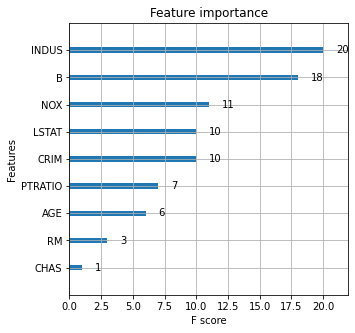

In [42]:
xgb.plot_importance(xg_reg)

plt.rcParams['figure.figsize'] = [5, 5]

plt.show()